In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Startup funding.csv")
df.head()

,Unnamed: 0,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment Type,Amount (in USD)
0,0,1.0,01/08/2015,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"500,000,000",Late Stage Round 7th (More details)
1,1,2.0,01/08/2015,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,"400,000",NaN
2,2,3.0,03/08/2015,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN
3,3,4.0,03/08/2015,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,"5,000,000",Series A
4,4,5.0,03/08/2015,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN


In [5]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [6]:
df.drop(['Sr. No.'], axis=1,inplace=True)

In [7]:
df.head()

,Date (dd/mm/yyyy),Startup Name,Industry/ Vertical,Sub-Vertical,City / Location,Investors’ Name,Investment Type,Amount (in USD)
0,01/08/2015,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"500,000,000",Late Stage Round 7th (More details)
1,01/08/2015,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,"400,000",NaN
2,03/08/2015,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN
3,03/08/2015,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,"5,000,000",Series A
4,03/08/2015,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date (dd/mm/yyyy)   3471 non-null   object
 1   Startup Name        3455 non-null   object
 2   Industry/ Vertical  3455 non-null   object
 3   Sub-Vertical        3452 non-null   object
 4   City / Location     3403 non-null   object
 5   Investors’ Name     3313 non-null   object
 6   Investment Type     3039 non-null   object
 7   Amount (in USD)     2145 non-null   object
dtypes: object(8)
memory usage: 219.6+ KB


In [9]:
df.isnull().sum()

Date (dd/mm/yyyy)       40
Startup Name            56
Industry/ Vertical      56
Sub-Vertical            59
City / Location        108
Investors’ Name        198
Investment Type        472
Amount (in USD)       1366
dtype: int64

In [10]:
df.dropna(how='all')
df.shape

(3511, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date (dd/mm/yyyy)   3471 non-null   object
 1   Startup Name        3455 non-null   object
 2   Industry/ Vertical  3455 non-null   object
 3   Sub-Vertical        3452 non-null   object
 4   City / Location     3403 non-null   object
 5   Investors’ Name     3313 non-null   object
 6   Investment Type     3039 non-null   object
 7   Amount (in USD)     2145 non-null   object
dtypes: object(8)
memory usage: 219.6+ KB


In [12]:
df=df.rename(columns = {"Date (dd/mm/yyyy)": "Date", "Startup Name":"Startup","Industry/ Vertical":"IndustryVertical","Sub-Vertical":"SubVertical","City / Location":"City","Investors’ Name":"InvestorName","Investment Type":"InvestmentType","Amount (in USD)":"Amount"})
df.head()

,Date,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,Amount
0,01/08/2015,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"500,000,000",Late Stage Round 7th (More details)
1,01/08/2015,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,"400,000",NaN
2,03/08/2015,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN
3,03/08/2015,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,"5,000,000",Series A
4,03/08/2015,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN


In [13]:
df.loc[df['Date']=="01/07/015", 'Date'] = "01/07/2015"
df.loc[df['Date']=="Â 10/7/2015", 'Date'] = "10/07/2015"
df.loc[df["Date"]=="13/04.2015", 'Date'] = "13/04/2015"
df.loc[df["Date"]=="05/072018", 'Date'] = "05/07/2018"
df.loc[df["Date"]=="22/01//2015", 'Date'] = "22/01/2015"
df.loc[df['Date']=="12/05.2015", 'Date'] = "12/05/2015"
df.loc[df['Date']=="15/01.2015", 'Date'] = "15/01/2015"

In [14]:
df['NewAmount'] = df['Amount']
df.loc[((df['Amount'].str.contains('[a-zA-Z]')) | (df['Amount'].isin(['nan','']))) & (df['InvestmentType'].str.contains('[0-9]')), 'NewAmount'] = df['InvestmentType']
df.iloc[347:355, :]

,Date,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,Amount,NewAmount
347,23/08/2019,Lo! Foods,Consumer Goods,Low carb food for Diabetics,Bengaluru,"Rashmi Daga (founder, FreshMenu), Raveen Sastr...",Seed Round,"500,000","500,000"
348,23/08/2019,Tala,FinTech,Digital Lending Platform,Santa Monica,RPS Ventures,Series D,"110,000,000","110,000,000"
349,22/08/2019,INDwealth,FinTech,Wealth Management,Gurgaon,Tiger Global Management,Venture Round,"15,000,000","15,000,000"
350,21/08/2019,HungerBox,Food and Beverage,B2B Foodtech,Bengaluru,One97 Communications Ltd.,Series C,"6,590,000","6,590,000"
351,23/08/2019,AdmitKard,EdTech,University Admissions,Noida,Growth DNA,Seed Round,"10,00,000","10,00,000"
352,19/08/2019,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,Undisclosed,Undisclosed
353,19/08/2019,Grofers,E-Commerce,Grocery Delivery,Gurgaon,Softbank Vision Fund,Series F,"70,000,000","70,000,000"
354,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,"3,900,000,000","3,900,000,000"


In [15]:
import re

In [16]:
# 6. Converting dftype of values in 'AmountUSD' column from string to float. Marking Undisclosed values to 'nan' and then converting into float type
# Also imputing blank values in 'Amount' column by minimum funding amount

df.loc[df['NewAmount'].isin(['undisclosed', 'unknown', 'Undisclosed', 'N/A']), 'NewAmount'] = 'nan'
df['NewAmount'] = df['NewAmount'].astype(str)
df['NewAmount'] = df['NewAmount'].apply(lambda x : re.sub("[^0-9]", "", x))
df.loc[df['NewAmount']=='', 'NewAmount'] = 0 #'nan' # replace with average of funding provided that months 
df['NewAmount'] = df['NewAmount'].astype(float)
df.loc[df['NewAmount']==0.0, 'NewAmount'] = df['NewAmount'].min()
df.head()

,Date,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,Amount,NewAmount
0,01/08/2015,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"500,000,000",Late Stage Round 7th (More details),500000000.0
1,01/08/2015,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,"400,000",NaN,0.0
2,03/08/2015,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN,0.0
3,03/08/2015,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,"5,000,000",Series A,5000000.0
4,03/08/2015,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN,0.0


In [17]:
## Correcting values in City column
df.loc[df["City"] == "Bangalore",'City'] = "Bengaluru"
df.loc[df["City"] == "Gurgaon",'City'] = "Gurugram"
df.loc[df["City"] == "New Delhi",'City'] = "Delhi"

In [18]:
df.head()

,Date,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,Amount,NewAmount
0,01/08/2015,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"500,000,000",Late Stage Round 7th (More details),500000000.0
1,01/08/2015,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,"400,000",NaN,0.0
2,03/08/2015,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN,0.0
3,03/08/2015,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,"5,000,000",Series A,5000000.0
4,03/08/2015,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN,0.0


In [19]:
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3471 non-null   datetime64[ns]
 1   Startup           3455 non-null   object        
 2   IndustryVertical  3455 non-null   object        
 3   SubVertical       3452 non-null   object        
 4   City              3403 non-null   object        
 5   InvestorName      3313 non-null   object        
 6   InvestmentType    3039 non-null   object        
 7   Amount            2145 non-null   object        
 8   NewAmount         3511 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 247.0+ KB


In [21]:
df["Year"] = df["Date"].map(lambda x: x.year)
df["Month"] = df["Date"].map(lambda x: x.month)

In [22]:
df.loc[(df['InvestmentType'].isin(['', 'N/A', 'Undisclosed investors', 'Undisclosed Investor', 'Undisclosed Investors',
            'Undisclosed', 'undisclosed investors', 'Undisclosed investor',
            'Undisclosed multiple investors', 'Undisclosed angel investors',
            '3 undisclosed investors'])) | (df['InvestmentType'].str.contains('[0-9]')), 'InvestmentType'] = 'Undisclosed Investors'

In [23]:
df.head()

,Date,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,Amount,NewAmount,Year,Month
0,2015-01-08,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,Undisclosed Investors,Late Stage Round 7th (More details),500000000.0,2015.0,1.0
1,2015-01-08,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,Undisclosed Investors,NaN,0.0,2015.0,1.0
2,2015-03-08,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN,0.0,2015.0,3.0
3,2015-03-08,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,Undisclosed Investors,Series A,5000000.0,2015.0,3.0
4,2015-03-08,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN,0.0,2015.0,3.0


In [24]:
df.loc[df['InvestorName'].isin(['',' ', "N/A"]), 'InvestorName'] = "Undisclosed Investor"

In [25]:
df.head()

,Date,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,Amount,NewAmount,Year,Month
0,2015-01-08,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,Undisclosed Investors,Late Stage Round 7th (More details),500000000.0,2015.0,1.0
1,2015-01-08,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,Undisclosed Investors,NaN,0.0,2015.0,1.0
2,2015-03-08,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN,0.0,2015.0,3.0
3,2015-03-08,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,Undisclosed Investors,Series A,5000000.0,2015.0,3.0
4,2015-03-08,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN,0.0,2015.0,3.0


In [26]:
# 11. removing rows not having startup name
df.drop(index=df[df['Startup']==''].index, inplace=True)

In [27]:
df.head()

,Date,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,Amount,NewAmount,Year,Month
0,2015-01-08,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,Undisclosed Investors,Late Stage Round 7th (More details),500000000.0,2015.0,1.0
1,2015-01-08,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,Undisclosed Investors,NaN,0.0,2015.0,1.0
2,2015-03-08,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,NaN,0.0,2015.0,3.0
3,2015-03-08,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,Undisclosed Investors,Series A,5000000.0,2015.0,3.0
4,2015-03-08,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,NaN,0.0,2015.0,3.0


In [28]:
startup_df = df[['Date', 'Year', 'Month', 'Startup', 'IndustryVertical', 'SubVertical', 'City', 'InvestorName', 'InvestmentType', 'NewAmount']]

In [29]:
startup_df.head()

,Date,Year,Month,Startup,IndustryVertical,SubVertical,City,InvestorName,InvestmentType,NewAmount
0,2015-01-08,2015.0,1.0,Snapdeal,Ecommerce Marketplace,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,Undisclosed Investors,500000000.0
1,2015-01-08,2015.0,1.0,Ressy,Restaurant Discount app,Pune,Mohandas Pai & others,Seed Funding,Undisclosed Investors,0.0
2,2015-03-08,2015.0,3.0,Cuelearn,Tech-enabled learning,New Delhi,Alok Mittal,Seed Funding,NaN,0.0
3,2015-03-08,2015.0,3.0,Connect India,ECommerce Logistics provider,New Delhi,Aavishkaar,Private Equity,Undisclosed Investors,5000000.0
4,2015-03-08,2015.0,3.0,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,NaN,0.0


In [30]:
startup_df.to_csv("Startup.csv")

In [31]:
startup_df.isnull().sum()

Date                 40
Year                 40
Month                40
Startup              56
IndustryVertical     56
SubVertical          59
City                108
InvestorName        198
InvestmentType      472
NewAmount             0
dtype: int64

In [32]:
startup_df = startup_df.dropna(subset=["Date"])

In [33]:
startup_df.isnull().sum()

Date                  0
Year                  0
Month                 0
Startup              16
IndustryVertical     16
SubVertical          19
City                 68
InvestorName        158
InvestmentType      432
NewAmount             0
dtype: int64

In [34]:
startup_df = startup_df.dropna(subset=["Startup"])
startup_df = startup_df.dropna(subset=["IndustryVertical"])
startup_df = startup_df.dropna(subset=["SubVertical"])
startup_df = startup_df.dropna(subset=["City"])
startup_df = startup_df.dropna(subset=["InvestorName"])
startup_df = startup_df.dropna(subset=["InvestmentType"])


In [35]:
startup_df.isnull().sum()

Date                0
Year                0
Month               0
Startup             0
IndustryVertical    0
SubVertical         0
City                0
InvestorName        0
InvestmentType      0
NewAmount           0
dtype: int64

In [36]:
startup_df.to_csv("Startup.csv")

#### EDA

In [37]:
numerical_features = [feature for feature in startup_df.columns if startup_df[feature].dtypes!='O']
numerical_features

['Date', 'Year', 'Month', 'NewAmount']

In [38]:
discrete_features = [feature for feature in numerical_features if len(startup_df[feature].unique())<25]
discrete_features

['Year', 'Month']

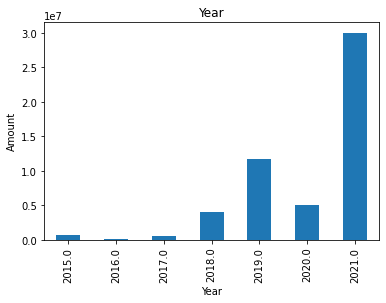

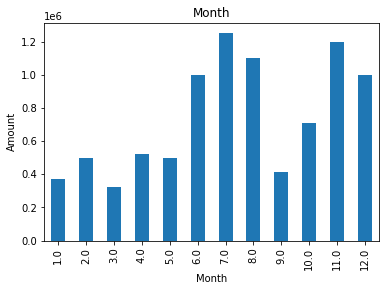

In [39]:
for feature in discrete_features:
    data = startup_df.copy()
    data.groupby(feature)['NewAmount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Amount")
    plt.title(feature)
    plt.show()

Highest number of investments are in the month of July and November. The lowest number of investments are in the month of January and February. 

The highest number of investments are in the year 2021.

In [40]:
df2 = startup_df["City"].value_counts().nlargest(10)

In [41]:
df2

Bengaluru    784
Mumbai       459
Delhi        342
Gurugram     319
Pune         100
Hyderabad     90
Chennai       87
Noida         76
Ahmedabad     29
Jaipur        27
Name: City, dtype: int64

In [42]:
df3 = startup_df["InvestorName"].value_counts().nlargest(10)

In [43]:
df3

Private Equity           282
Seed Funding             238
Undisclosed Investors     31
Undisclosed investors     23
Indian Angel Network      17
Ratan Tata                16
Venture Catalysts         14
Info Edge (India) Ltd     11
Y Combinator              11
undisclosed investors     11
Name: InvestorName, dtype: int64

In [44]:
df4 = startup_df["InvestmentType"].value_counts().nlargest(10)

In [45]:
df4

Private Equity           1057
Seed Funding              899
Undisclosed Investors     519
Seed/ Angel Funding       131
Series A                   45
Seed / Angel Funding       41
Series B                   31
Debt Funding               29
Series C                   28
Seed                       25
Name: InvestmentType, dtype: int64

In [46]:
df5 = startup_df["Startup"].value_counts().nlargest(10)

In [47]:
df5

Nykaa           11
Swiggy          10
Ola Cabs         7
Meesho           7
Udaan            7
Shuttl           7
Blackbuck        6
PolicyBazaar     6
1mg              6
EazyDiner        6
Name: Startup, dtype: int64

In [48]:
df6 = startup_df["IndustryVertical"].value_counts().nlargest(10)

In [49]:
df6

Consumer Internet    1047
Technology            511
eCommerce             189
Healthcare             87
Finance                73
ECommerce              61
E-commerce             35
Logistics              35
E-Commerce             27
Fin-Tech               24
Name: IndustryVertical, dtype: int64

In [50]:
df7 = startup_df["SubVertical"].value_counts().nlargest(10)

In [51]:
df7

Bangalore                  137
Mumbai                     115
New Delhi                   80
Gurgaon                     66
Hyderabad                   18
Pune                        17
Chennai                     15
Online Lending Platform     14
Noida                       11
Online Pharmacy             10
Name: SubVertical, dtype: int64

In [52]:
startup_df.columns

Index(['Date', 'Year', 'Month', 'Startup', 'IndustryVertical', 'SubVertical',
       'City', 'InvestorName', 'InvestmentType', 'NewAmount'],
      dtype='object')

In [53]:
categorical_features = [feature for feature in startup_df.columns if startup_df[feature].dtypes=='O']
categorical_features

['Startup',
 'IndustryVertical',
 'SubVertical',
 'City',
 'InvestorName',
 'InvestmentType']

### Number of fundings per year

In [56]:
startup_df["Year"] = startup_df["Year"].astype('int')

In [59]:
funding_count_yr = pd.DataFrame(startup_df["Year"].value_counts())
funding_count_yr.rename(columns={"Year":"Number of Fundings"}, inplace=True)
funding_count_yr

,Number of Fundings
2016,1013
2017,684
2015,520
2018,518
2020,117
2019,106
2021,29


In [79]:
### Let us find the total sum of the funding amount for each year

funding_sum_yr = pd.DataFrame(startup_df.groupby("Year")["NewAmount"].sum(),columns=["NewAmount"])
funding_sum_yr.rename(columns={"NewAmount":"Total Funding amount (in USD)"} , inplace=True)
funding_sum_yr

,Total Funding amount (in USD)
Year,
2015,7.034710e+09
2016,3.905806e+09
2017,1.042661e+10
2018,8.764096e+09
2019,1.098163e+10
2020,7.500000e+16
2021,3.915104e+09


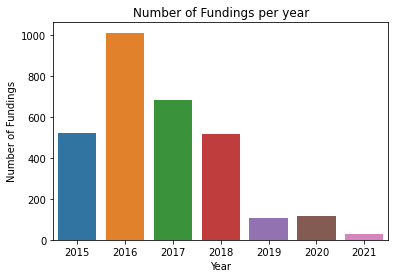

In [80]:
sns.barplot(x = funding_count_yr.index, y = funding_count_yr["Number of Fundings"])
plt.title("Number of Fundings per year")
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.show()

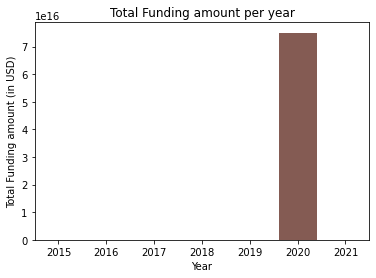

In [82]:
sns.barplot(x = funding_sum_yr.index, y = funding_sum_yr["Total Funding amount (in USD)"])
plt.title("Total Funding amount per year")
plt.xlabel("Year")
plt.ylabel("Total Funding amount (in USD)")
plt.show()

Fundings in 2020 are much higher than all the others. The difference is of the order of 10^7.

### Impact of cities in Startups

In [88]:
city_funding = pd.DataFrame(startup_df["City"].value_counts().nlargest(10))
city_funding = city_funding.rename({"City":"Number of Fundings vs City"},axis=1)
city_funding

,Number of Fundings vs City
Bengaluru,784
Mumbai,459
Delhi,342
Gurugram,319
Pune,100
Hyderabad,90
Chennai,87
Noida,76
Ahmedabad,29
Jaipur,27


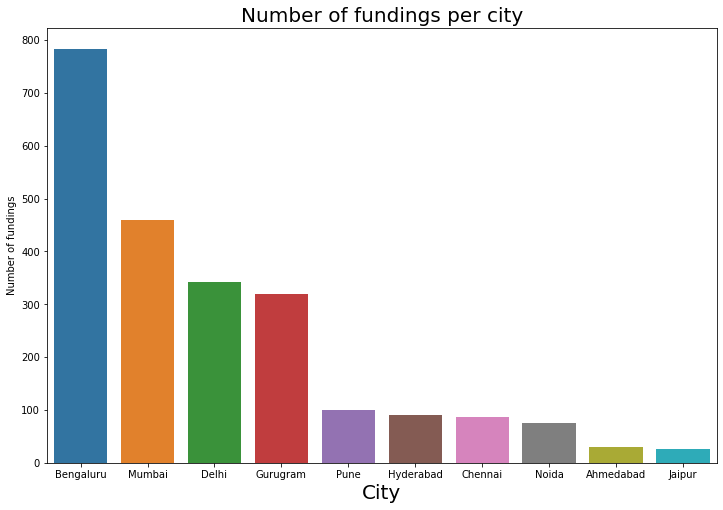

In [112]:
plt.figure(figsize=(12,8))
sns.barplot(x = city_funding.index, y = city_funding["Number of Fundings vs City"])
plt.title("Number of fundings per city",fontsize=20)
plt.xlabel("City", fontsize=20)
plt.ylabel("Number of fundings")
plt.show()

As we can see, most of the fundings are in Banglore, since it is the IT hub of India. Mumbai is the second most popular city for startups.

In [113]:
### Top 5 investors

investor_funding = pd.DataFrame(startup_df["InvestorName"].value_counts().nlargest(5))
investor_funding = investor_funding.rename(columns={"InvestorName":"Number of investments per Investor"})
investor_funding

,Number of investments per Investor
Private Equity,282
Seed Funding,238
Undisclosed Investors,31
Undisclosed investors,23
Indian Angel Network,17


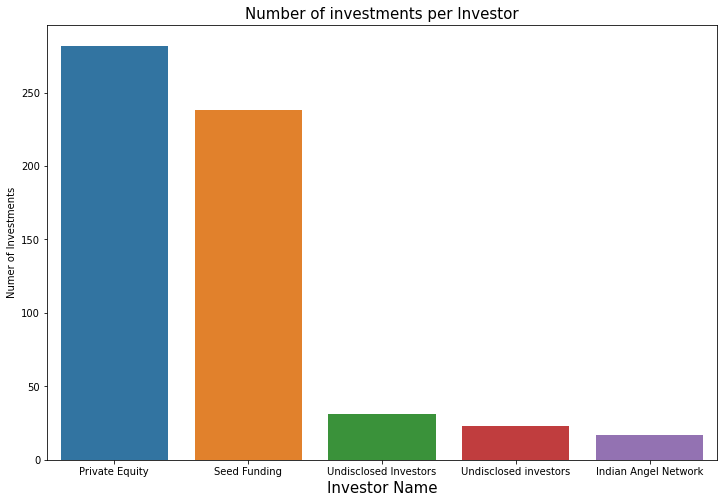

In [116]:
plt.figure(figsize=(12,8))
sns.barplot(x = investor_funding.index, y = investor_funding["Number of investments per Investor"])
plt.title("Number of investments per Investor",fontsize=15)
plt.xlabel("Investor Name", fontsize=15)
plt.ylabel("Numer of Investments")
plt.show()

### Thus, we have done the EDA on the dataset.